**Step -1 : Importing libraries**

In [5]:
import numpy as np
import pandas as pd
import nltk # natural language processing
import re # regular expression
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [17]:
stop = stopwords.words('english')
stop.remove('not')

**Step -2: Load dataset**

In [3]:
dataset = pd.read_csv('review.tsv', delimiter='\t', encoding='latin-1')

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**Step -3: Extracting dataframes into list**

In [6]:
print(dataset.keys())
print(dataset.info())

Index(['Review', 'Liked'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


In [7]:
X = dataset['Review'] # where i contain reivews
y = dataset['Liked'] # respective likes

In [10]:
Review = X[0]
Review

'Wow... Loved this place.'

In [20]:
corpus = []
for Review in X:
    # step -1: coverting into lower case
    review = Review.lower()
    # step -2: removing special character and number
    review = re.sub('[^a-zA-Z]',' ',review)
    # step -3: convert into list -> since we need to work on words
    review = review.split()
    # step -4: Stemming -> identifying root words and removing stopwords
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stop)]
    review = ' '.join(review)
    # press tab
    corpus.append(review)

print(review) 

wast enough life pour salt wound draw time took bring check


# Bag of word model
- Count Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer()

In [24]:
X_new = cv.fit_transform(corpus).toarray()
y = dataset['Liked'].values

In [29]:
print(len(cv.get_feature_names()))
print(cv.get_feature_names())

1566
['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'b

**Step -5: Splting data**

In [31]:
from sklearn.cross_validation import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y , test_size = 0.2, 
                                                   random_state = 0)

**Step -6: Building Machine Learning model**

In [38]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [39]:
model_M = MultinomialNB()
model_G = GaussianNB()

In [40]:
# Traning model
model_M.fit(x_train, y_train)
model_G.fit(x_train,y_train)

GaussianNB(priors=None)

In [51]:
y_pred_M = model_M.predict(x_test)
y_pred_G = model_G.predict(x_test)

**Step -7: Evaluation**

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
cm_M = confusion_matrix(y_test, y_pred_M)
cm_G = confusion_matrix(y_test, y_pred_G)

In [54]:
import seaborn as sns

In [55]:
import matplotlib.pyplot as plt

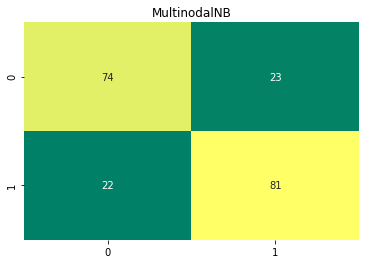

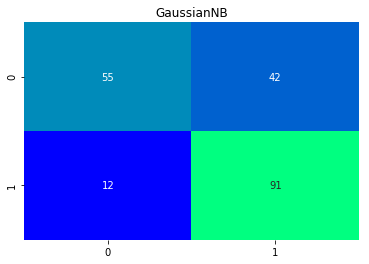

In [56]:
sns.heatmap(cm_M, annot=True, cbar=False,cmap='summer')
plt.title('MultinodalNB')
plt.show()
sns.heatmap(cm_G, annot=True, cbar=False,cmap = 'winter')
plt.title('GaussianNB')
plt.show()

In [57]:
cr_M = classification_report(y_test,y_pred_M)
cr_G = classification_report(y_test,y_pred_G)

In [58]:
print(cr_M)
print('='*50)
print(cr_G)

             precision    recall  f1-score   support

          0       0.77      0.76      0.77        97
          1       0.78      0.79      0.78       103

avg / total       0.77      0.78      0.77       200

             precision    recall  f1-score   support

          0       0.82      0.57      0.67        97
          1       0.68      0.88      0.77       103

avg / total       0.75      0.73      0.72       200



In [59]:
from sklearn.externals import joblib

In [60]:
joblib.dump(model_M, 'nlp_multinodal.pkl')
joblib.dump(model_G, 'nlp_gaussian.pkl')

['nlp_gaussian.pkl']

# Application 

In [82]:
text = 'I love machine learning class'

In [83]:
# step -1: coverting into lower case
review = text.lower()
# step -2: removing special character and number
review = re.sub('[^a-zA-Z]',' ',review)
# step -3: convert into list -> since we need to work on words
review = review.split()
# step -4: Stemming -> identifying root words and removing stopwords
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stop)]
review = ' '.join(review)

In [84]:
review = [review]

In [85]:
review

['love machin learn class']

In [86]:
test = cv.transform(review).toarray()

In [87]:
model_M.predict(test)

array([1], dtype=int64)